# Project 4 - Income Prediction Model

### Our dataset contains financial information for adults in the United States. The purpose of this script is to attempt to identify individuals that will make over 50k Income. This notebook contains 4 models and a set of visualizations that try to solve that problem. The goal is to accomplish at least a 75% accuracy score on the models. 

 ### Read adult_cleaned.csv data from the Resources folder into a Pandas DF and Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Read the data into a Pandas DataFrame
data = pd.read_csv('Resources/adult_cleaned.csv')
data.head()

,age,workclass,education,marital.status,occupation,relationship,race,sex,hours.per.week,Income over 50k? 0=no 1=yes
0,82,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,18,0
1,54,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,40,0
2,41,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,40,0
3,34,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,45,0
4,38,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,40,0


### Identify the target variable and features

In [2]:
# y variable labels
y = data['Income over 50k? 0=no 1=yes']

# x variable features
X = data.drop('Income over 50k? 0=no 1=yes', axis=1)

In [3]:
# Review y variable series
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: Income over 50k? 0=no 1=yes, dtype: int64


In [4]:
# Review X variable DataFrame
X.head()

,age,workclass,education,marital.status,occupation,relationship,race,sex,hours.per.week
0,82,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,18
1,54,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,40
2,41,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,40
3,34,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,45
4,38,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,40


### Split into training and testing datasets

In [5]:
from sklearn.model_selection import train_test_split

# split the data and use random state 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Categorical Columns, Data Transformation and One Hot Encoding

In [6]:
# Categorical columns
categorical = X.select_dtypes(include=['object']).columns.tolist()

# Preprocess and transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical)
    ], remainder='passthrough')

# Transforming the data
X_encoded = preprocessor.fit_transform(X)

# Splitting the data
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=1)

# First Logistic Regression Model

In [7]:
# Creating and fitting the model
model1 = LogisticRegression(random_state=1, max_iter=1000)
model1.fit(X_train_encoded, y_train)

C:\Users\walje\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=1)

In [8]:
# Prediction
y_pred = model1.predict(X_test_encoded)

### First Model Evaluation 

In [9]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8326822916666666
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89      4610
           1       0.70      0.58      0.63      1534

    accuracy                           0.83      6144
   macro avg       0.78      0.75      0.76      6144
weighted avg       0.83      0.83      0.83      6144



#### The first model achieves an accuracy of 83.26% which outperforms the goal of 75%. The 83.26% represents the total predictions (both income below and above 50k) that were correct. 
#### The classification report for class 0 (those who's income is less than or greater to 50k) shows a precision of 87% (of all predictions in this class, 87% were correct) and a recall of 92%. This high recall suggests the model is very efficient in identifying  those making under 50k and is not likely to miss those cases. 
#### The classification report for class 1 (those who's income is more than 50k) shows a precision of 70% and a recall of 58%. Both are lower than class 0, meaning we're less efficient at identifying those who's income is more than 50k per year. Specifically with recall being 58%, we are missing a significant number of individuals in this class. In order to attempt to make improvements on this model, we will create another Logistic Regression model with some modifications.

# Second Logistic Regression Model

In [10]:
# Creating and fitting model2
model2 = LogisticRegression(random_state=1, max_iter=2500, C=0.5, penalty='l1', solver='liblinear')
model2.fit(X_train_encoded, y_train)

LogisticRegression(C=0.5, max_iter=2500, penalty='l1', random_state=1,
                   solver='liblinear')

#### Changes of parameters made in this model: max iterations changed from 1000 to 2500, 'C=0.5' controls model strength which helps with overfitting, 'penalty' shrinks a lot of the coefficients to 0, and can be beneficial of only a few of the features are relevant in the dataset, 'solver' supports the penalty and is important for optimization.

In [11]:
# Prediction2
y_pred2 = model2.predict(X_test_encoded)

### Second Model Evaluation

In [12]:
accuracy2 = accuracy_score(y_test, y_pred)
report2 = classification_report(y_test, y_pred)

print("Accuracy:", accuracy2)
print("Classification Report:\n", report2)

Accuracy: 0.8326822916666666
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89      4610
           1       0.70      0.58      0.63      1534

    accuracy                           0.83      6144
   macro avg       0.78      0.75      0.76      6144
weighted avg       0.83      0.83      0.83      6144



#### The second model achieves an accuracy of 83.26% which is exactly the same as the first model. The classification report shows the same results too. This shows that the logistic regression model we are using is not sensitive at all to changes in parameters. This is an indication that the original model was already near-optimal  and there's not much that can be done to improve this specific model.
#### These results lead us to try another type of model altogether. We will now build a Random Forest model.

# Random Forest Model

In [13]:
# Creating and fitting model3
model3 = RandomForestClassifier(n_estimators=100, random_state=1)
model3.fit(X_train_encoded, y_train)

RandomForestClassifier(random_state=1)

In [14]:
# Prediction3
y_pred3 = model3.predict(X_test_encoded)

### Third Model Evaluation

In [15]:
accuracy3 = accuracy_score(y_test, y_pred)
report3 = classification_report(y_test, y_pred)

print("Accuracy:", accuracy3)
print("Classification Report:\n", report3)

Accuracy: 0.8326822916666666
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89      4610
           1       0.70      0.58      0.63      1534

    accuracy                           0.83      6144
   macro avg       0.78      0.75      0.76      6144
weighted avg       0.83      0.83      0.83      6144



#### Once again, we observe the same results of 83.26% accuracy and the same classification report. There a couple reasons for this. The first is a strong baseline performance. The initial model we made may have been so good at identifying the patterns in the data, that adding both changes to the parameters OR changing models entirely might not provide a significant (or any) benefit. This can be explained with data that is considered to strongly be linear and/or the initial set of features do more than enough in the prediction process that nothing more can be done. In order to try to narrow down the specific variables that might be more impactful, let's create a visualization of some different features.

# Create Matplotlib Visualization to Isolate Variables

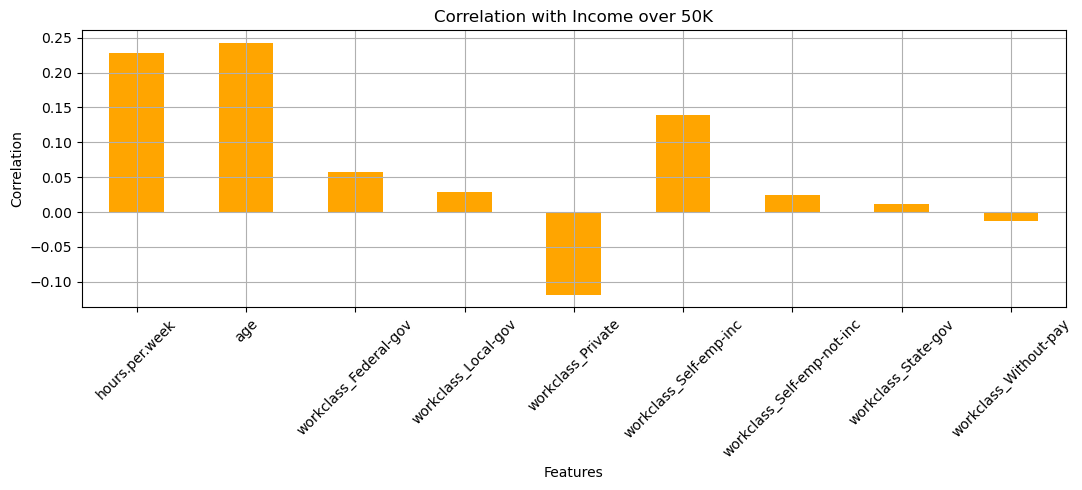

In [22]:
import matplotlib.pyplot as plt

data1 = pd.get_dummies(data, columns=['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex'])

# Correlation calculation
correlation = data1.corr()['Income over 50k? 0=no 1=yes']

# Filter the features
features = ['hours.per.week', 'age'] + [col for col in correlation.index if 'workclass' in col]
filtered = correlation[features]

# Plot
plt.figure(figsize=(11, 5))
filtered.plot(kind='bar', color='orange')
plt.title('Correlation with Income over 50K')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Selecting Features based on visualization

In [28]:
# Correlation visualization features
X_reduced = data[['hours.per.week', 'age']]
y = data['Income over 50k? 0=no 1=yes']

### Splitting the data into training sets again

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=1)

# Third Logistic Regression Model (with reduced features)

In [30]:
# Creating and fitting model4
model4 = LogisticRegression(random_state=1, max_iter=1000)
model4.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [31]:
# Prediction4
y_pred = model4.predict(X_test)

### Fourth Model Evaluation

In [32]:
accuracy4 = accuracy_score(y_test, y_pred)
report4 = classification_report(y_test, y_pred)

print("Accuracy:", accuracy4)
print("Classification Report:\n", report4)

Accuracy: 0.7503255208333334
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.96      0.85      4610
           1       0.50      0.12      0.19      1534

    accuracy                           0.75      6144
   macro avg       0.63      0.54      0.52      6144
weighted avg       0.70      0.75      0.69      6144



#### Although we finally see a change in the outcome, it's unfortunately not a change in the right direction. Instead of the 83.26% accuracy we achieved before, this model sees a 75.03% accuracy, which barely reaches our goal. This suggests that isolating what showed to be the more "correlated" variables not only didn't help the model, it significantly hurt the model. On top of that, all other numbers on the classification report dropped, except for the recall score for class 0. This is an indication that the model with isolated features is worse in many ways but can potentially outperform the other models in correctly identifying those who will make less than 50k. Overall, this model should not be used or built upon and we should return to trying other ideas.